# Введение
Сегодня мы будем продолжать работу над модулем два. В рамках данного занятия мы будем использовать [датасет](https://www.kaggle.com/datasets/seshupavan/air-pollution-data-of-india-2020-2023?rvi=1) с выбросами в Индии с 2020 по 2023 гг.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [ ]:
quality_cities = pd.read_csv("https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_02_visualization/air_pollution_data.csv")
quality_cities

,city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,Ahmedabad,30-11-2020,5,520.71,2.38,16.28,130.18,47.68,65.96,72.13,8.36
1,Ahmedabad,01-12-2020,5,1682.28,7.71,54.84,0.73,21.70,120.95,154.53,27.36
2,Ahmedabad,02-12-2020,5,1815.80,16.54,49.35,0.17,23.84,133.47,172.63,28.12
3,Ahmedabad,03-12-2020,5,2296.45,41.57,40.10,0.00,35.76,150.37,202.15,36.48
4,Ahmedabad,04-12-2020,5,2189.64,23.92,58.95,0.02,28.13,160.79,205.80,40.53
...,...,...,...,...,...,...,...,...,...,...,...
23499,Visakhapatnam,21-05-2023,3,353.81,0.00,2.08,100.14,4.11,37.53,47.09,0.08
23500,Visakhapatnam,22-05-2023,3,380.52,0.00,3.77,82.97,5.07,32.17,43.44,1.74
23501,Visakhapatnam,23-05-2023,3,390.53,0.00,4.28,80.11,5.19,36.01,48.06,1.20
23502,Visakhapatnam,24-05-2023,3,300.41,0.00,1.36,95.84,2.21,30.17,48.89,0.00


# Задание 1.
Создайте новый столбец в датасете, который будет содержать среднесуточный индекс качества воздуха (aqi_mean). Преобразуйте датасет из дневных данных в месячные, сгруппировав по городу и месяцу, и посчитав среднее значение индекса качества воздуха для каждого месяца. Постройте lineplot, где по оси x будут месяцы, по оси y - среднесуточный индекс качества воздуха, а цветом линий будет обозначен город.

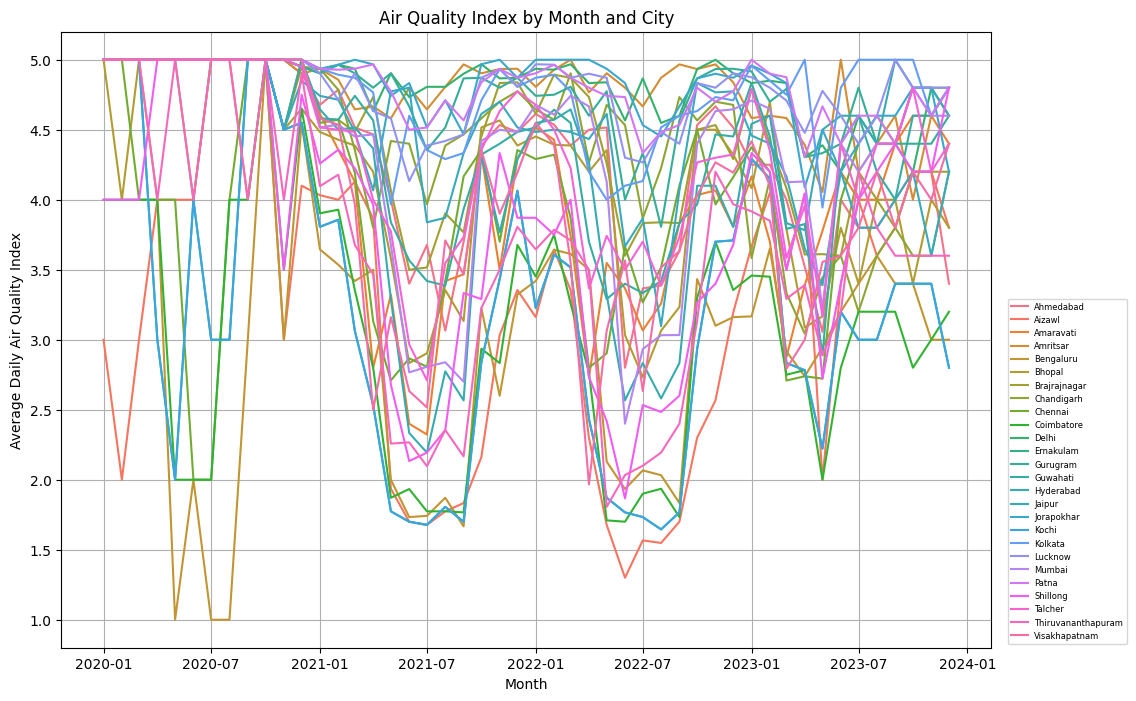

In [ ]:
# преобразуем столбец date в формат datetime
quality_cities['date'] = pd.to_datetime(quality_cities['date'])

# создаем новый столбец с среднесуточным индексом качества воздуха
quality_cities['aqi_mean'] = quality_cities['aqi']

# преобразуем датасет из дневных данных в месячные, сгруппировав по городу и месяцу, и посчитав среднее значение индекса качества воздуха
quality_cities['year'] = quality_cities['date'].dt.year
quality_cities_monthly = quality_cities.groupby([quality_cities['city'], quality_cities['year'], quality_cities['date'].dt.month]).mean(numeric_only=True).reset_index()
quality_cities_monthly.rename(columns={'date': 'month'}, inplace=True)
quality_cities_monthly['date'] = pd.to_datetime(quality_cities_monthly[['year', 'month']].assign(day=1))

# строим линейный график
plt.figure(figsize=(12, 8))
sns.lineplot(data=quality_cities_monthly, x='date', y='aqi_mean', hue='city')
plt.xlabel('Month')
plt.ylabel('Average Daily Air Quality Index')
plt.title('Air Quality Index by Month and City')
plt.grid(True)
plt.legend(loc='lower right', fontsize=6, bbox_to_anchor=(1.15, 0))
plt.show()

# Задание 2.
Создайте новый столбец в датасете, который будет содержать долю выбросов оксида азота. С помощью метода .apply() напишите функцию, которая будет вычислять долю выбросов оксида азота как отношение суммы выбросов оксида азота к сумме всех выбросов. С помощью метода .pipe() напишите функцию, которая будет фильтровать датасет по городам с плохим качеством воздуха (aqi больше 4). Постройте barplot, где по оси x будут года, по оси y - средняя доля выбросов оксида азота, а цветом столбцов будет обозначен город.

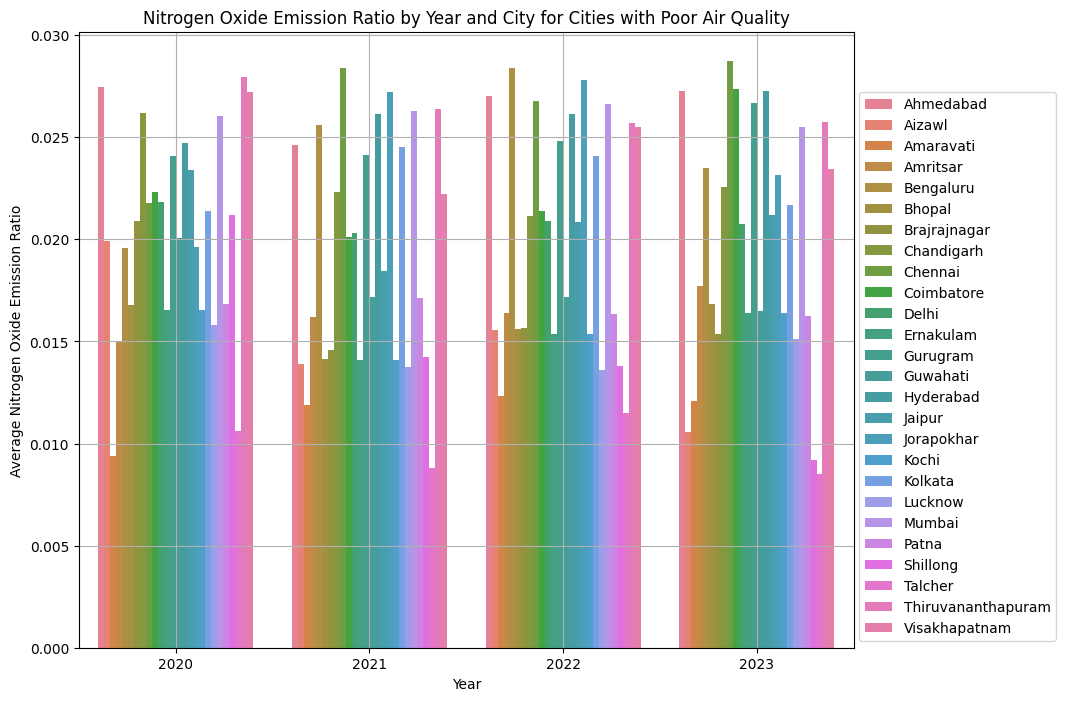

In [ ]:
def calculate_no_ratio(row):
    return (row['no'] + row['no2']) / (row['co'] + row['no'] + row['no2'] + row['o3'] + row['so2'] + row['pm2_5'] + row['pm10'] + row['nh3'])

# создаем новый столбец с долей выбросов оксида азота
quality_cities['no_ratio'] = quality_cities.apply(calculate_no_ratio, axis=1)

# определяем функцию для фильтрации по качеству воздуха
def filter_by_aqi(quality_cities, aqi):
    return quality_cities[quality_cities['aqi'] > aqi]

# фильтруем датасет по городам с плохим качеством воздуха
quality_cities_filtered = quality_cities.pipe(filter_by_aqi, aqi=4)

# группируем данные по году и городу, считаем среднюю долю выбросов оксида азота
quality_cities_grouped = quality_cities_filtered.groupby(['city', quality_cities_filtered['date'].dt.year])['no_ratio'].mean().reset_index()

# строим столбчатую диаграмму
plt.figure(figsize=(10, 8))
sns.barplot(data=quality_cities_grouped, x='date', y='no_ratio', hue='city')
plt.xlabel('Year')
plt.ylabel('Average Nitrogen Oxide Emission Ratio')
plt.grid()
plt.title('Nitrogen Oxide Emission Ratio by Year and City for Cities with Poor Air Quality')
plt.legend(loc='lower right', bbox_to_anchor=(1.27, 0))
plt.show()

# Задание 3.
Создайте новый столбец в датасете, который будет содержать категорию качества воздуха в зависимости от значения aqi. Категории определите следующим образом: отличное - aqi от 0 до 50; хорошее - aqi от 51 до 100; удовлетворительное - aqi от 101 до 200; плохое - aqi от 201 до 300; очень плохое - aqi от 301 до 400; опасное - aqi больше 400. Назовите столбец ‘air_quality’. Затем постройте pie chart, который будет показывать долю каждой категории в общем количестве наблюдений. Используйте plt.pie() для этого.

In [ ]:
pd.qcut(quality_cities['aqi'], 8, duplicates='drop')

0        (4.0, 5.0]
1        (4.0, 5.0]
2        (4.0, 5.0]
3        (4.0, 5.0]
4        (4.0, 5.0]
            ...    
23499    (2.0, 3.0]
23500    (2.0, 3.0]
23501    (2.0, 3.0]
23502    (2.0, 3.0]
23503    (3.0, 4.0]
Name: aqi, Length: 23504, dtype: category
Categories (4, interval[float64, right]): [(0.999, 2.0] < (2.0, 3.0] < (3.0, 4.0] < (4.0, 5.0]]

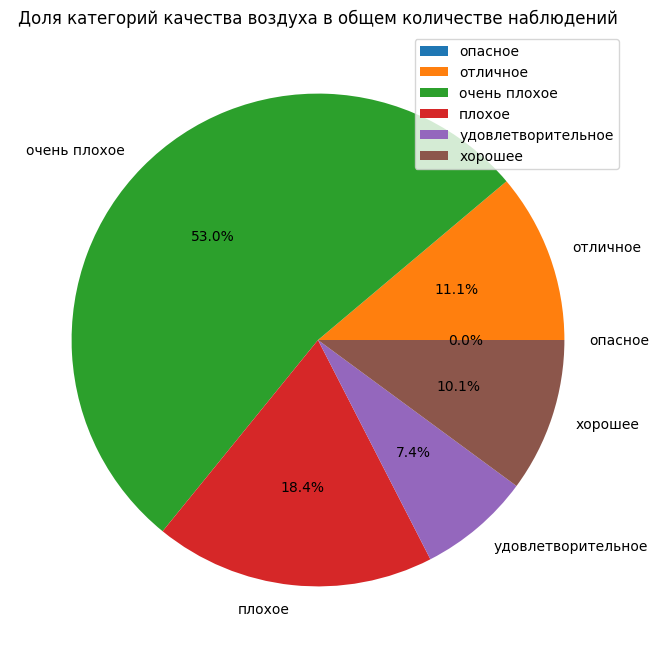

In [ ]:
# Определяем функцию, которая возвращает категорию качества воздуха в зависимости от aqi
import pandas as pd

def get_air_quality(aqi):
    # Определение интервалов и меток категорий
    bins = [-float('inf'), 0, 1, 2, 3, 4, 5, float('inf')]
    labels = ['опасное', 'отличное', 'хорошее', 'удовлетворительное', 'плохое', 'очень плохое', 'опасное']

    # Использование pd.cut() для создания категориальной переменной
    air_quality = pd.cut(aqi, bins=bins, labels=labels, right=True, ordered=False)

    return air_quality

# Применяем функцию к датасету и создаем новый столбец 'air_quality'
quality_cities['air_quality'] = quality_cities['aqi'].pipe(get_air_quality)


# Группируем датасет по категории качества воздуха и находим количество наблюдений для каждой категории
grouped_df = quality_cities.groupby('air_quality')['aqi'].count().reset_index()

# Строим pie chart, показывающий долю каждой категории в общем количестве наблюдений
plt.figure(figsize=(8, 8))
plt.pie(grouped_df['aqi'], labels=grouped_df['air_quality'], autopct='%1.1f%%')
plt.legend()
plt.title('Доля категорий качества воздуха в общем количестве наблюдений')
plt.show()

# Bonus: создание html графиков в plotly

## Scatter plot

In [ ]:
import plotly
import plotly.graph_objs as go

data = pd.read_csv('https://raw.githubusercontent.com/GeorgeSeif/plotly_tutorial/master/train.csv')

# Create a trace
trace = go.Scatter(
    x = data['YearBuilt'],
    y = data['SalePrice'],
    mode = 'markers',
    showlegend = True
)
plot_data = [trace]

# Plot and embed in ipython notebook!
plotly.offline.plot(plot_data, filename='basic-scatter.html')

'basic-scatter.html'

## Box plot

In [ ]:
# Create a trace
trace = go.Box(
    x = data['YearBuilt'],
    y = data['SalePrice'],
    marker = {'color': 'green'},
    showlegend = True,
)
plot_data = [trace]

# Plot and embed in ipython notebook!
plotly.offline.plot(plot_data, filename='basic-box.html')


'basic-box.html'

## Heat map

In [ ]:
# Compute the correlation matrix
corrmat = data.corr()

# Create a trace
trace = go.Heatmap(z=corrmat, x=corrmat.columns.tolist(), y=corrmat.columns.tolist())
plot_data = [trace]

# Plot and embed in ipython notebook!
plotly.offline.plot(plot_data, filename='basic-heatmap.html')

<ipython-input-157-9c3218500b5e>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



'basic-heatmap.html'

In [ ]:

# -- Import and clean data (importing csv into pandas)
# df = pd.read_csv("intro_bees.csv")
df = pd.read_csv("https://raw.githubusercontent.com/Coding-with-Adam/Dash-by-Plotly/master/Other/Dash_Introduction/intro_bees.csv")
df

,Program,Year,Period,State,ANSI,Affected by,Pct of Colonies Impacted,state_code
0,SURVEY,2019,JAN THRU MAR,Alabama,1,Disease,1.8,AL
1,SURVEY,2019,JAN THRU MAR,Alabama,1,Other,3.1,AL
2,SURVEY,2019,JAN THRU MAR,Alabama,1,Pesticides,0.3,AL
3,SURVEY,2019,JAN THRU MAR,Alabama,1,Pests_excl_Varroa,22.7,AL
4,SURVEY,2019,JAN THRU MAR,Alabama,1,Unknown,9.0,AL
...,...,...,...,...,...,...,...,...
4585,SURVEY,2015,OCT THRU DEC,Wyoming,56,Other,11.3,WY
4586,SURVEY,2015,OCT THRU DEC,Wyoming,56,Pesticides,10.5,WY
4587,SURVEY,2015,OCT THRU DEC,Wyoming,56,Pests_excl_Varroa,3.3,WY
4588,SURVEY,2015,OCT THRU DEC,Wyoming,56,Unknown,3.9,WY


In [ ]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 23.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import plotly.express as px  # (version 4.7.0 or higher)
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output  # pip install dash (version 2.0.0 or higher)





app = Dash(__name__)

df = df.groupby(['State', 'ANSI', 'Affected by', 'Year', 'state_code'])[['Pct of Colonies Impacted']].mean()
df.reset_index(inplace=True)
print(df[:5])

# ------------------------------------------------------------------------------
# App layout
app.layout = html.Div([

    html.H1("Самый простой дашборд", style={'text-align': 'center'}),

    dcc.Dropdown(id="slct_year",
                 options=[
                     {"label": "2015", "value": 2015},
                     {"label": "2016", "value": 2016},
                     {"label": "2017", "value": 2017},
                     {"label": "2018", "value": 2018}],
                 multi=False,
                 value=2015,
                 style={'width': "40%"}
                 ),

    html.Div(id='output_container', children=[]),
    html.Br(),

    dcc.Graph(id='my_bee_map', figure={})

])

@app.callback(
    [Output(component_id='output_container', component_property='children'),
     Output(component_id='my_bee_map', component_property='figure')],
    [Input(component_id='slct_year', component_property='value')]
)
def update_graph(option_slctd):
    print(option_slctd)
    print(type(option_slctd))

    container = "Год, выбранный пользователем: {}".format(option_slctd)

    dff = df.copy()
    dff = dff[dff["Year"] == option_slctd]
    dff = dff[dff["Affected by"] == "Varroa_mites"]

    # Plotly Express
    fig = px.choropleth(
        data_frame=dff,
        locationmode='USA-states',
        locations='state_code',
        scope="usa",
        color='Pct of Colonies Impacted',
        hover_data=['State', 'Pct of Colonies Impacted'],
        color_continuous_scale=px.colors.sequential.YlOrRd,
        labels={'Pct of Colonies Impacted': '% of Bee Colonies'},
        template='plotly_dark'
    )

    return container, fig


# ------------------------------------------------------------------------------
if __name__ == '__main__':
    app.run_server(debug=True)

     State  ANSI Affected by  Year state_code  Pct of Colonies Impacted
0  Alabama     1     Disease  2015         AL                      0.05
1  Alabama     1     Disease  2016         AL                      1.20
2  Alabama     1     Disease  2017         AL                      2.25
3  Alabama     1     Disease  2018         AL                      1.30
4  Alabama     1     Disease  2019         AL                      1.80


<IPython.core.display.Javascript object>

# Задание 4.
Используя метод .pipe(), напишите функцию, которая будет принимать датасет и возвращать новый датасет, в котором будут удалены все строки с пропущенными значениями, а также все строки, в которых aqi равен 0. Примените функцию к датасету и сохраните результат в новую переменную. Затем постройте heatmap, который будет показывать корреляцию между различными выбросами в новом датасете. Используйте seaborn.heatmap() для этого.

<ipython-input-144-b89a77023af1>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(clean_df.corr(), annot=True, cmap='coolwarm')


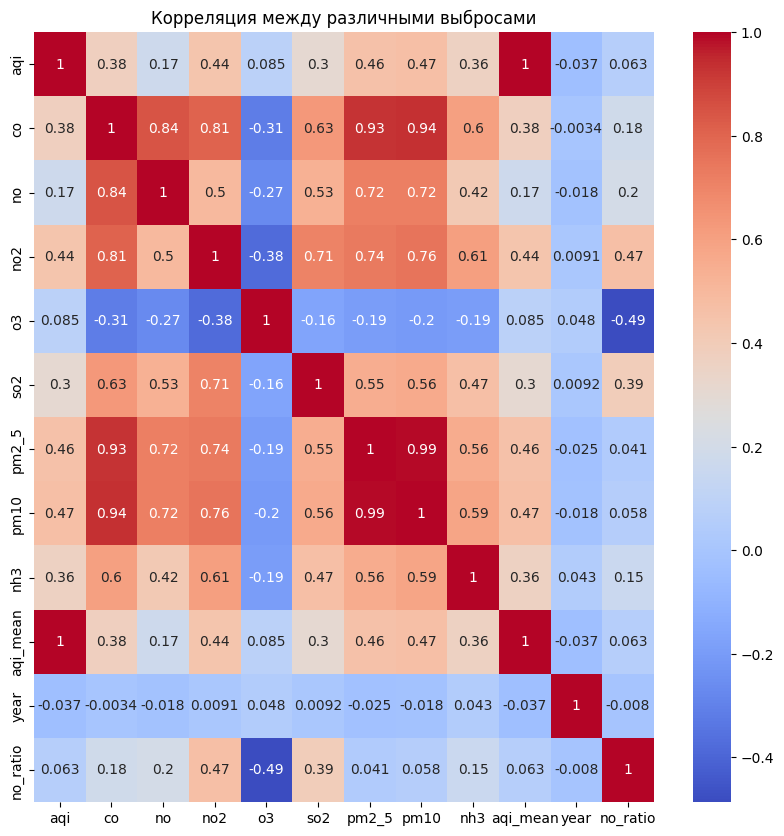

In [ ]:
# Определяем функцию, которая удаляет все строки с пропущенными значениями и aqi равным 0
def clean_data(df):
    # Удаляем все строки с пропущенными значениями
    df = df.dropna()
    # Удаляем все строки с aqi равным 0
    df = df[df['aqi'] != 0]
    # Возвращаем новый датасет
    return df

# Применяем функцию к датасету с помощью метода .pipe() и сохраняем результат в новую переменную
clean_df = quality_cities.pipe(clean_data)

# Строим heatmap, показывающий корреляцию между различными выбросами в новом датасете
plt.figure(figsize=(10, 10))
sns.heatmap(clean_df.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляция между различными выбросами')
plt.show()

# Задание 5.

Напишите функцию, которая будет принимать на вход датасет и название города, а возвращать среднее значение AQI (индекса качества воздуха) за каждый месяц в этом городе. Примените эту функцию к датасету и создайте кастомный lineplot, который будет показывать динамику изменения AQI по месяцам для четырех городов: Дели, Мумбаи, Ченнаи и Калькутта. Используйте разные цвета и маркеры для каждого города, а также добавьте легенду и подписи осей.

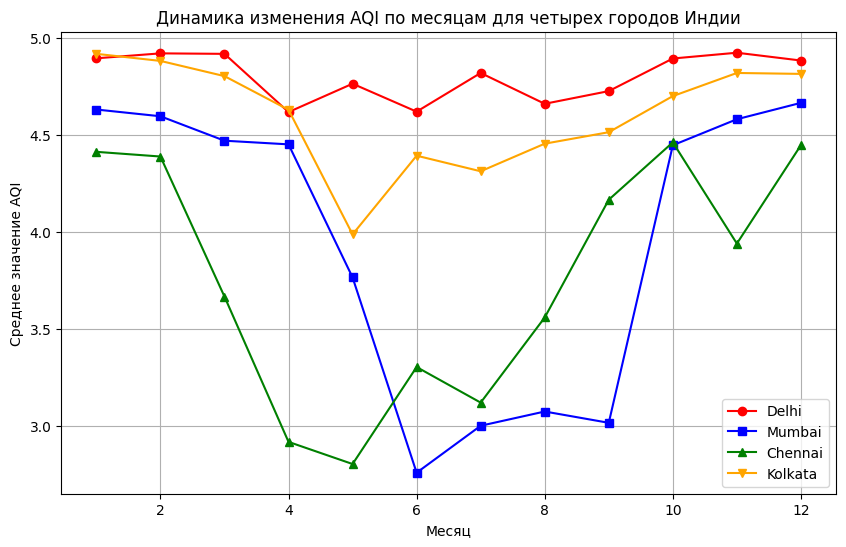

In [ ]:
# Напишем функцию, которая будет возвращать среднее значение AQI за каждый месяц в заданном городе
def get_monthly_aqi(df, city):
    # Фильтруем датасет по городу
    df_city = df[df["city"] == city]
    # Группируем датасет по месяцам и находим среднее значение AQI
    df_monthly = df_city.groupby(df_city["date"].dt.month)["aqi"].mean()
    # Возвращаем результат
    return df_monthly

# Создаем список городов, для которых хотим построить график
cities = ["Delhi", "Mumbai", "Chennai", "Kolkata"]

# Создаем словарь цветов и маркеров для каждого города
colors = {"Delhi": "red", "Mumbai": "blue", "Chennai": "green", "Kolkata": "orange"}
markers = {"Delhi": "o", "Mumbai": "s", "Chennai": "^", "Kolkata": "v"}

# Создаем фигуру и оси для графика
fig, ax = plt.subplots(figsize=(10, 6))

# Для каждого города из списка
for city in cities:
    # Получаем среднее значение AQI за каждый месяц
    monthly_aqi = get_monthly_aqi(quality_cities, city)
    # Строим линию на графике с соответствующим цветом и маркером
    ax.plot(monthly_aqi.index, monthly_aqi.values, color=colors[city], marker=markers[city], label=city)

# Добавляем легенду, подписи осей и заголовок
ax.legend(loc='lower right')
ax.set_xlabel("Месяц")
ax.set_ylabel("Среднее значение AQI")
ax.set_title("Динамика изменения AQI по месяцам для четырех городов Индии")
plt.grid()
# Показываем график
plt.show()

# Задание 6.
Напишите функцию, которая будет принимать на вход датасет и название загрязняющего вещества (например, co, no2, pm2_5 и т.д.), а возвращать датасет, в котором будут только те города, в которых среднее значение этого вещества выше среднего по всем городам. Примените эту функцию к датасету и создайте график violinplot, который будет показывать распределение значений выбранного вещества по городам. Используйте параметр hue, чтобы разделить график на две части по уровню AQI (высокий или низкий). Добавьте заголовок, подписи осей и легенду.

<ipython-input-149-c1206008864c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_pollution["aqi_level"] = df_high_pollution["aqi"].apply(lambda x: "Высокий" if x > 3 else "Низкий")


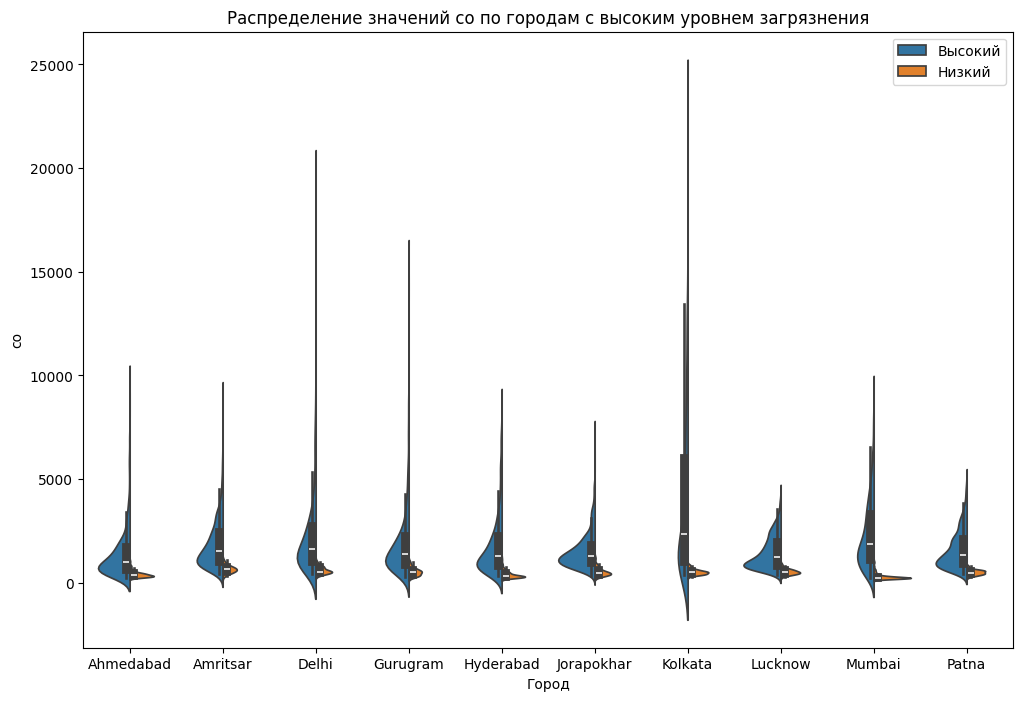

In [ ]:
# Напишем функцию, которая будет возвращать датасет, в котором будут только те города, в которых среднее значение заданного вещества выше среднего по всем городам
def get_high_pollution_cities(df, pollutant):
    # Находим среднее значение вещества по всем городам
    mean_pollutant = df[pollutant].mean()
    # Группируем датасет по городам и находим среднее значение вещества для каждого города
    df_grouped = df.groupby("city")[pollutant].mean()
    # Фильтруем датасет по тем городам, в которых среднее значение вещества выше среднего по всем городам
    df_filtered = df[df["city"].isin(df_grouped[df_grouped > mean_pollutant].index)]
    # Возвращаем результат
    return df_filtered

# Выберем вещество, для которого хотим построить график
pollutant = "co"

# Получаем датасет, в котором будут только те города, в которых среднее значение выбранного вещества выше среднего по всем городам
df_high_pollution = get_high_pollution_cities(quality_cities, pollutant)

# Создаем новый столбец, в котором будем хранить уровень AQI (высокий или низкий) в зависимости от значения в столбце aqi
df_high_pollution["aqi_level"] = df_high_pollution["aqi"].apply(lambda x: "Высокий" if x > 3 else "Низкий")

# Создаем фигуру и оси для графика
fig, ax = plt.subplots(figsize=(12, 8))

# Строим violinplot, который будет показывать распределение значений выбранного вещества по городам, разделенное по уровню AQI
sns.violinplot(x="city", y=pollutant, hue="aqi_level", data=df_high_pollution, split=True, ax=ax)

# Добавляем заголовок, подписи осей и легенду
ax.set_title("Распределение значений {} по городам с высоким уровнем загрязнения".format(pollutant))
ax.set_xlabel("Город")
ax.set_ylabel(pollutant)
ax.legend()

# Показываем график
plt.show()